<a href="https://colab.research.google.com/github/riverdogcabin/PSDS4900/blob/main/wu_predict_observations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import json
from pprint import pprint
import pandas as pd
from datetime import datetime
from datetime import timedelta
from time import sleep
# import ipywidgets as widgets
from sklearn.linear_model import LinearRegression, Ridge
from joblib import dump, load


In [ ]:
def transform_df(df, params):#, variable=['windspeedAvg']):#,num_stations=5,my_station='KCOPARKE414',target_variable='windspeedAvg'):
  # if(isinstance(variable,str)):
  #   variable = [variable]
  df_reshaped = pd.DataFrame()
  for var in params.keys():
    #get num_stations most correlated stations from corr_df for each of the variables in the variable list
    # target_stations = corr_df.sort_values(var+'_corr',ascending=False).stationID.to_list()[:num_stations]
    # target_stations.append(my_station)
    df_filtered = df[df.stationID.isin(params.get(var))]
    if (df_reshaped.shape[0]>0):
      # df_reshaped = pd.concat([df_reshaped, df_filtered.pivot_table(index='timestamp_rounded',columns='stationID',values=var)], axis=1)
      df_reshaped = pd.concat([df_reshaped, df_filtered.pivot_table(index='timestamp_rounded',columns='stationID',values=var)], axis=1)
    else:
      df_reshaped = df_filtered.pivot_table(index='timestamp_rounded',columns='stationID',values=var)
      # before = df_reshaped.shape[0]
  # append my_station windspeedAvg so we have a y target
  # df_filtered = df[df.stationID.isin([my_station])]
  # df_reshaped = pd.concat([df_reshaped, df_filtered.pivot_table(index='timestamp_rounded',columns='stationID',values=target_variable)], axis=1)
  df_reshaped.dropna(inplace=True)
  return df_reshaped

In [ ]:
# Get Config Data from LinearRegression.config
with open('/content/drive/MyDrive/Capstone/PSDS4900/LinearRegression.config') as configuration:
  config = json.load(configuration)
  model_location = config.get('model') #location of the model
  stations = config.get('stations')
  columns_to_pull = config.get('columns_to_pull')
  params = config.get('params')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone/PSDS4900/wu_data/predictions_observations_20210101_20210131.csv')
df['timestamp'] = pd.to_datetime(df['epoch'], unit='s')
df = df.assign(timestamp_rounded=df.timestamp.dt.round('60min')) #rounded to the hour
print('with dupes',df.shape)
before = df.shape[0]
df.drop_duplicates(inplace=True)
print('without dupes',df.shape)
print('difference: ',before-df.shape[0])

with dupes (18758, 40)
without dupes (18758, 40)
difference:  0


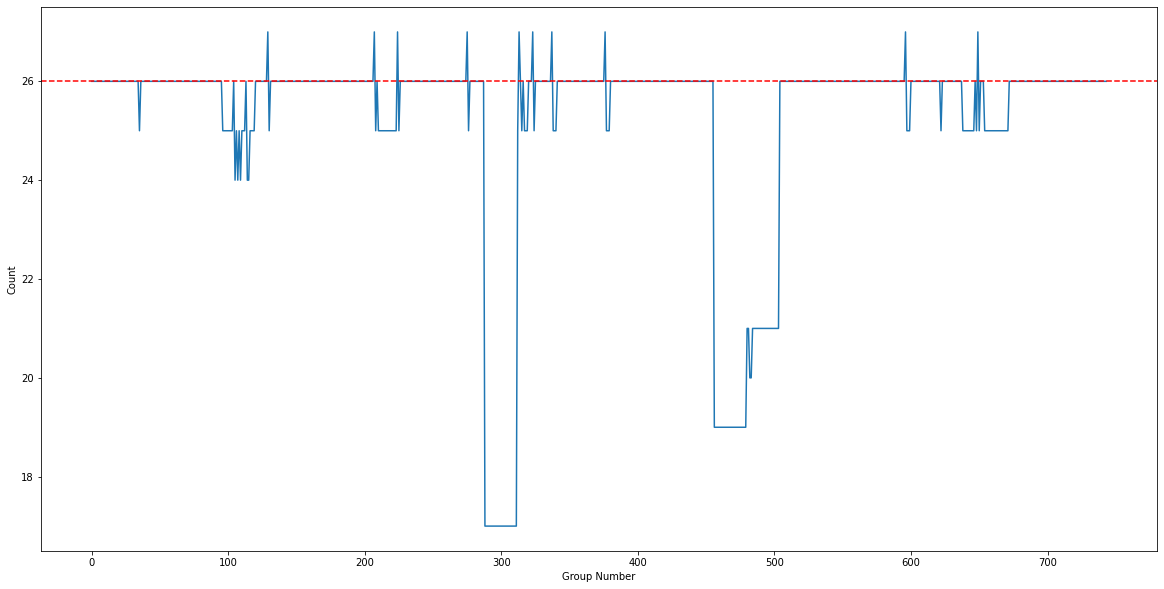

In [ ]:
num_stations = len(df.stationID.unique())
counted_df = df.groupby(['timestamp_rounded']).count().reset_index()
ax = counted_df.windspeedAvg.plot(xlabel='Group Number',ylabel='Count',figsize=(20, 10))
ax.axhline(y=num_stations,color='red',linestyle='--')
hour_grouping_std = counted_df.stationID.std()

In [ ]:
print(df.shape)
print(df[df.stationID.isin(stations)].shape)

(18758, 40)
(18758, 40)


In [ ]:
df_for_pred = transform_df(df,params)

In [ ]:
df_for_pred.shape

(583, 60)

In [ ]:
model = load(model_location)

In [ ]:
preds = model.predict(df_for_pred)

In [ ]:
len(preds)

583

In [ ]:
df_for_pred.shape

(583, 60)

In [ ]:
preds.mean()

0.43886216033325043